In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import torch
import torch.nn as nn
sys.path.append(os.path.abspath('..'))
from model.train_models import Trainer
from dataset.dataloader1 import PlayingCardDataset

In [2]:
trainer = Trainer(random_seed = 12)

In [3]:
model, train_losses, train_accuracies, valid_losses, valid_accuracies, test_losses, test_accuracies = trainer.train_conv_model()

 0 epoch done
 1 epoch done
 2 epoch done
 3 epoch done
 4 epoch done
 5 epoch done
 6 epoch done
 7 epoch done
 8 epoch done
 9 epoch done
 10 epoch done
 11 epoch done
 12 epoch done
 13 epoch done
 14 epoch done
Best Accuracy: 0.9807692307692307, Epoch: 12, Loss: 0.07498315352086837


In [15]:
model

CardClassifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=6, bias=True)
  (act): LeakyReLU(negative_slope=0.01)
  (act2): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)

In [16]:
def plot_accuracy_performance(train_accuracies, val_accuracies, test_accuracies):
    plt.plot(train_accuracies, label = "training accuracy",color = 'r')
    plt.plot(val_accuracies, label = "validation accuracy",color = 'g')
    plt.plot(test_accuracies,label = "test accuracy",color = 'b')
    plt.legend()
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')
    return
def plot_loss_performance(train_losses, val_losses, test_losses):
    plt.plot(train_losses, label = "training loss",color = 'r')
    plt.plot(val_losses, label = "validation loss",color = 'g')
    plt.plot(test_losses, label = "testing loss",color = 'b')
    plt.legend()
    plt.title("Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel('Loss')
    return

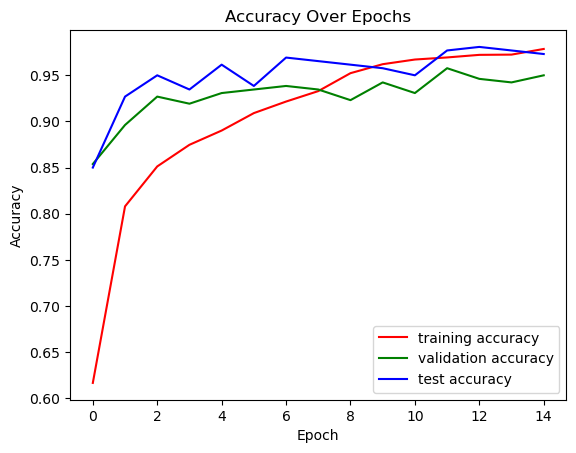

In [17]:
plot_accuracy_performance(train_accuracies, valid_accuracies, test_accuracies)

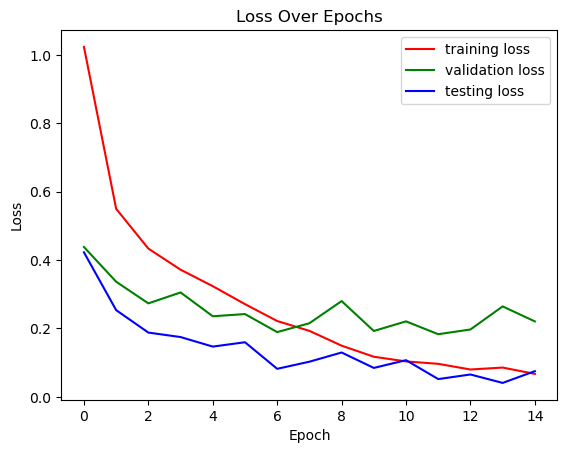

In [18]:
plot_loss_performance(train_losses, valid_losses, test_losses)

In [19]:
class_labels = {
    0: "Black Ace",
    1: "Black Face Card",
    2: "Black Number Card",
    3: "Red Ace",
    4: "Red Face Card",
    5: "Red Number Card",
}

In [20]:
example, _, _, = PlayingCardDataset.get_data_loaders(batch_size = 15)
for images, labels in example:
    break

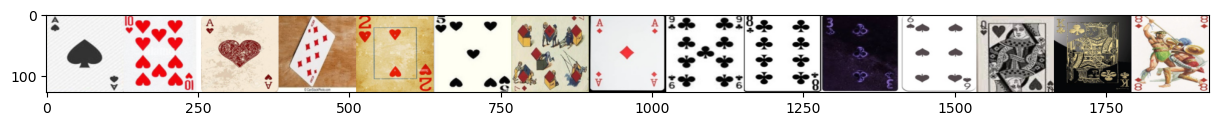

In [21]:
plot_images = (images * 255.0)
plot_images = plot_images.numpy().transpose(0, 2, 3, 1).astype(np.uint8)
plt.figure(figsize=(15, 5))
plt.imshow(np.hstack(plot_images))
plt.show()

In [22]:
model.eval()
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
else:
    if torch.backends.mps.is_available():
        device = "mps"
images, labels = images.to(device), labels.to(device)
with torch.no_grad():
    outputs = model(images)
    predictions = torch.argmax(outputs, 1)

In [23]:
predictions

tensor([0, 5, 3, 5, 5, 5, 5, 3, 2, 2, 2, 2, 4, 1, 5], device='cuda:0')

In [24]:
labels

tensor([0, 5, 3, 5, 5, 5, 5, 3, 2, 2, 2, 2, 4, 1, 5], device='cuda:0')

In [25]:
predictions == labels

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True], device='cuda:0')